#### Physics 112: Section 1: Professor Holzapfel 
#### HW3, Computational problem 1 
#### Biased Random Walk
Copyright 2021 by the Regents of the University of California. All rights reserved.


To gain some deeper understanding of the random walk in one dimendsion, particularly when the probability of steps in different directions is not equal, it is illuminating to simulate it.

Start by importing the necessary python numerical and statistics libraries:

In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


We start by generating sequences of N steps, +1 or -1, for our random walker to take. Because we are trying to sample a probability distribution with discrete support {-1, 1}, one convenient implementation is to use the numpy random.choice() function. 

#### a) Use this function in the cell below to produce a list of  $N=10000$ steps of +1 or -1 with equal probability. This list details a specific trajectory of a random walker where the probability of steps to the left and right are equal. You do not need to print the sequence, however, you should determine the sum and mean. The sum of this sequence is the final displacement at the conclusion of the random walk of $N$ steps. Input your answer in the cell below.

In [13]:
#a) Solution

random = np.random.default_rng().choice
N = 10000   # length of list
L = []      # list to be generated 
choices = [-1,1]
for i in range(N):
    L.append(random(choices))

print(sum(L), sum(L)/N)




110 0.011


You will notice in the documentation for numpy.random.choice() that you have the ability to alter the probability of stepping +1 to be different from p=0.5. Changing this value from 0.5 is identical to the problem of the biased coin toss that you solved in HW1. Set the probability of step of $-1$ to $(1-p)$ and set of $+1$ to $p$.
#### b) Produce another sequence of 10000 steps with $p=0.25$ and determine the sum and mean of the sequence.


In [14]:
#b) Solution
p = .25
probabilities =  [1-p, p]    # probabiliy for each item(-1,1)

L_b = []

for i in range(N):
    L_b.append(random(choices, p = probabilities))

print(sum(L_b), sum(L_b)/N)


-4972 -0.4972


We are interested in the distribution of final displacements after different sequences of steps. To determine the distribution of net displacements after N steps, we repeatedly generate trajectories to find the frequency with which our random walker ends up at various displacements from the origin. 

#### c) Write a function Trajectories(M, N, p)  to repeat the generation of $M$ trajectories each with $N$ steps, where each step has a probability p of $+1$ and $(1-p)$ of $-1$. This function should output an array of M integers representing where the random walker ends up for each trial.

In [15]:
#c) Solution



def Trajectories(M, N, p):
    # generate a total of M trajectories, with each having N steps, each step having probability [1-p,p]
    # output: array of M integers with each representing the final location after N steps
    ans = []
    for i in range(M):
        ans.append(
            sum(random([-1,1], N, p=[1-p,p]))
        )
    return ans

    


print(len(Trajectories(10, 10000, 0.25)))





# def gen(N, p):
#         # generate an individual trajectory with the specified choices and probabilities for each choice
#         L = []
#         for i in range(N):
#             L.append(random(choices, p = [1-p, p]))
#         return L

#     for i in range(M):
#         arr.append(sum(gen(N,p)))
#     return arr



10


#### d) Generate $M=1000$ sequences of  $N=10000$ steps with $p=0.5$. Create a histogram of the final results. Use $\sim 50$ bins for the histogram and scale the x axis to include the full range of results for the final trajectories. This histogram represents the relative probability of ending up at a given displacement after N steps.

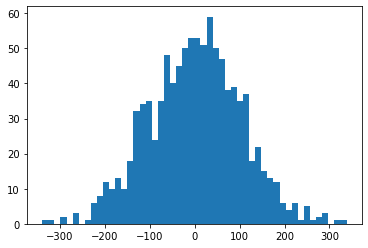

1000


In [16]:
#d) Solution
bin_count,M,N,p = 50,1000,10000,0.5
trajectory_final_positions = np.array(Trajectories(M,N,p))

plt.hist(trajectory_final_positions, bins = bin_count)
plt.show()


print(len(trajectory_final_positions))



In [ ]:
#### e) Compute the mean and variance of this distribution

In [ ]:
#e) Solution

In [17]:
#e) Solution
print(np.mean(trajectory_final_positions))
print(np.var(trajectory_final_positions))

1.206
10523.389564


#### f) Repeat the creation of the histogram of displacemnts and the calculation of the mean and variance for the case where $p=0.25$. Keep the number of trials $M=1000$ and number of steps $N=10000$.

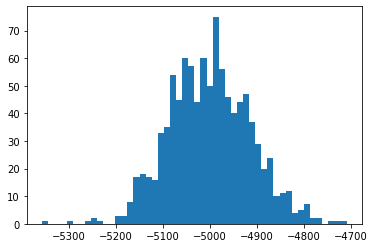

-5000.386
7445.591004000001


In [18]:
#f) Solution
trajectory_final_positions = np.array(Trajectories(M,N,0.25))

plt.hist(trajectory_final_positions, bins = bin_count, )
plt.show()

print(np.mean(trajectory_final_positions))
print(np.var(trajectory_final_positions))



Compare the mean and variance for different values of N and p. Your results should compare well with the analytical expressions found in your treatment of the biased coin toss in HW1, where $p$ is the probability of stepping in the $+1$ direction

$$\mathrm{Mean} = N(2p-1) \qquad \mathrm{Variance} = 4Np(1-p).$$

Recall that the binomial distribution describing this problem is:
$$P(N, r) = \binom{N}{r} p^r (1-p)^{N-r},$$
where $r$ is number of +1 steps in the trajectory. Rewrite this in terms of the net displacement $x = r - (N-r)$. We can then compare this analytical result to our numerical result by overplotting the binomial distribution with the results of our simulations.

#### g) Overplot the exact biased binomial distribution over the histogram of ending distances. The function scipy.stats.binom.pmf can be used to compute this directly. Explore values of $p = 0.25, 0.5, 0.75$ and show that the binomial distribution describes the data and that the measured mean and vairance agree with the expectations from the binomial distribution. Keep the number of trials $M=1000$ and number of steps $N=10000$.

asserted: total probability:  1.0000000000000002
[-296, -284, -270, -256, -256, -244, -244, -244, -230, -230, -230, -230, -216, -216, -216, -216, -216, -202, -202, -202, -202, -202, -202, -202, -190, -190, -190, -190, -190, -190, -190, -190, -190, -176, -176, -176, -176, -176, -176, -176, -176, -176, -176, -176, -162, -162, -162, -162, -162, -162, -162, -162, -162, -162, -162, -162, -162, -162, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -148, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -136, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -122, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -108, -96, -96, -96, -96, -96, -96, -9

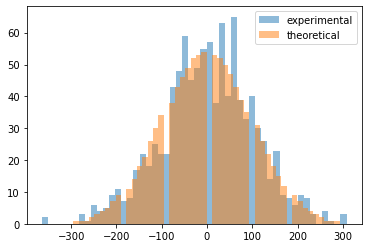

In [56]:
#g) Solution
p = 0.5     # change this between 0.25, 0.5, 0.75
assert M == 1000 and N == 10000

def R(x):
    # note that the returned value is ROUNDED to INTEGERS. Otherwise pmf function returns 0
    return int(round(0.5 * (x+N)))

def X(r):
    # transform r back to x
    return 2*r - N

trajectory_final_positions = np.array(Trajectories(M,N,p))
_min, _max = min(trajectory_final_positions), max(trajectory_final_positions)
x = np.arange(_min, _max, step = (_max-_min)/bin_count)

r_list = [R(i) for i in x]



# print(r_list)






theoretical_trajectory_final_positions = []


def P(r):
    # print("-----P is called.------ ")
    # print("r and p are: ", r, p)
    # print("------------------------")
    return st.binom.pmf(r, N, p)




# print("testing ----", r_list[1])
# print(st.binom.pmf(4843.1, 10000, 0.5))

# for each value of r, calculate the probability associated with it, then multiply that with the total number of trials to get the actual number of times that particular value of r value is met.  Push r this many times into theoretical_trajectory_final_positions list. This is analogous to the trajectory_final_positions list. 



#normalize
_sum = sum(
    [P(r) for r in r_list]
)

_normalized_probabilities = [P(r) / _sum for r in r_list]

# print(_sum)

# print(M * P(r_list[0]))

assert abs(1-sum(_normalized_probabilities)) < 1/100
print("asserted: total probability: ", sum(_normalized_probabilities))


for r in r_list:
    prob_r  = P(r) / _sum
    # print("---probability:", prob_r)
    X_r = X(r)
    append_how_many_times = int(round(M * prob_r))
    
    for i in range(append_how_many_times):
        theoretical_trajectory_final_positions.append(X_r)



print(theoretical_trajectory_final_positions)
print("hello world")

# pyplot.hist(x, bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')

plt.hist(trajectory_final_positions, bins = bin_count, alpha = 0.5, label = 'experimental')
plt.hist(theoretical_trajectory_final_positions, bins = bin_count,alpha = 0.5,  label = 'theoretical')

# pyplot.legend(loc='upper right')

plt.legend(loc = 'upper right')
plt.show()



